In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics
import scipy.stats as st
from datetime import datetime


books = pd.read_csv ('books_.csv', encoding= 'unicode_escape')
books.head()

,index,title,author,author_sex,author_nationality,publisher,publisher_country,month_year,day,pages,ranks,best_seller_rank,general_subject,specific_subject,price,link
0,0,The New American Revolution: The Making of a P...,Kayleigh McEnany,Female,American,Threshold Editions,USA,19-Oct,1,336,378.0,169.159,History,Populism,13.18,https://www.amazon.co.uk/New-American-Revoluti...
1,1,The Finance Curse: How global finance is makin...,Nicholas Shaxson,Male,British,Vintage,UK,19-Oct,17,384,49.0,112.227,Finance,Poor vs Rich,7.99,https://www.amazon.co.uk/Finance-Curse-global-...
2,2,In Light of Yesterday: The Backstory of the Gl...,Brady Raanes,Male,American,Brady Raanes,USA,19-Oct,21,224,44.0,79.231,History,Economy,7.56,https://www.amazon.co.uk/Light-Yesterday-Backs...
3,3,Just a Girl: Growing Up Female and Ambitious,Lucinda Jackson,Female,American,She Writes Press,USA,19-Oct,8,280,18.0,"5,142,822",Sociology,Women,9.99,https://www.amazon.co.uk/Just-Girl-Growing-Fem...
4,4,Socialism: An Economic and Sociological Analysis,Ludwig Von Mises,Male,Austrian,Must Have Books,NaN,19-Oct,23,602,149.0,"2,478,962",Economy,Socialism,18.81,https://www.amazon.co.uk/Socialism-Sociologica...


In [2]:
books.describe()

,index,day,pages,ranks,price
count,80.0000,80.000000,80.000000,80.000000,80.000000
mean,39.5000,14.387500,288.612500,55.592050,18.044625
std,23.2379,9.050483,125.424696,106.299071,15.281543
min,0.0000,1.000000,53.000000,0.000000,4.610000
25%,19.7500,8.000000,199.750000,5.000000,10.702500
50%,39.5000,15.000000,282.000000,17.000000,14.200000
75%,59.2500,22.000000,360.000000,46.750000,19.870000
max,79.0000,30.000000,733.000000,654.000000,113.370000


In [3]:
books.columns

Index(['index', 'title', 'author', 'author_sex', 'author_nationality',
       'publisher', 'publisher_country', 'month_year', 'day ', 'pages',
       'ranks', 'best_seller_rank', 'general_subject', 'specific_subject',
       'price', 'link'],
      dtype='object')

In [4]:
books.shape

(80, 16)

In [5]:
books.dtypes

index                   int64
title                  object
author                 object
author_sex             object
author_nationality     object
publisher              object
publisher_country      object
month_year             object
day                     int64
pages                   int64
ranks                 float64
best_seller_rank       object
general_subject        object
specific_subject       object
price                 float64
link                   object
dtype: object

In [6]:
books.isnull().sum()

index                  0
title                  0
author                 0
author_sex             1
author_nationality    13
publisher              0
publisher_country     14
month_year             0
day                    0
pages                  0
ranks                  0
best_seller_rank      20
general_subject        0
specific_subject       0
price                  0
link                   0
dtype: int64

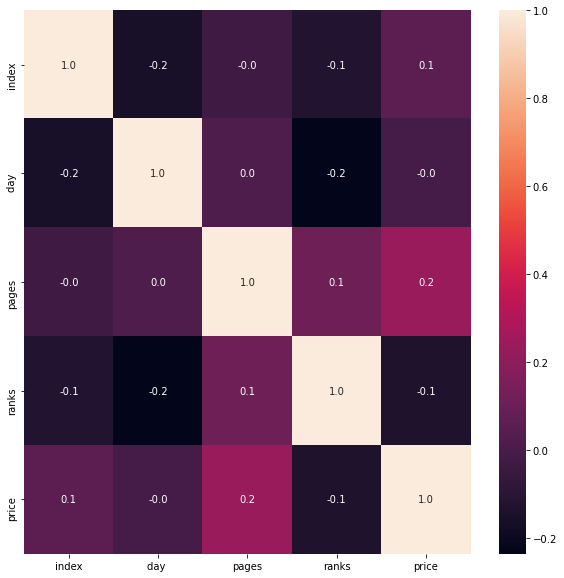

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(books.corr(),annot=True,fmt='.1f')
plt.show()

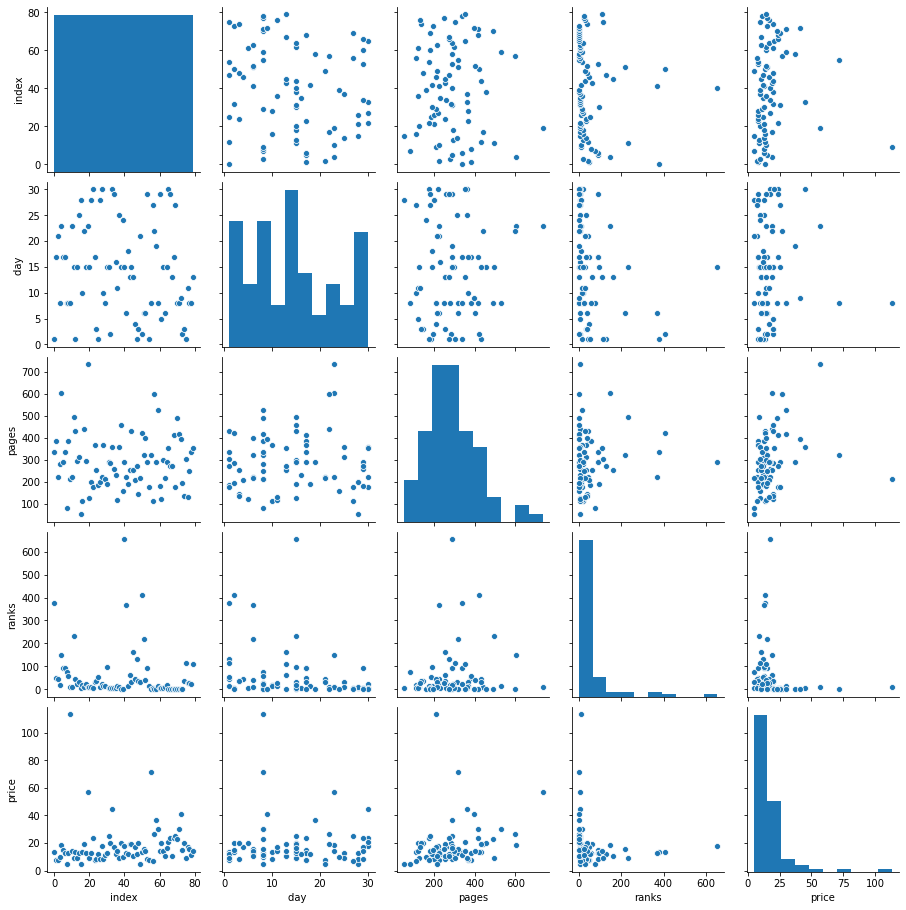

In [8]:
sns.pairplot(books)
plt.show()

In [9]:
books['general_subject'].astype(str)

0      History 
1       Finance
2      History 
3     Sociology
4      Economy 
        ...    
75     Economy 
76      Finance
77     Economy 
78     Economy 
79     Economy 
Name: general_subject, Length: 80, dtype: object

In [10]:
books['specific_subject'].astype(str)

0                  Populism
1              Poor vs Rich
2                  Economy 
3                     Women
4                 Socialism
              ...          
75                Resources
76                   Credit
77    International Economy
78           Failure, Fraud
79                Resources
Name: specific_subject, Length: 80, dtype: object

In [11]:
books['publisher_country'].astype(str)

0     USA
1      UK
2     USA
3     USA
4     nan
     ... 
75    USA
76     UK
77     UK
78     UK
79    USA
Name: publisher_country, Length: 80, dtype: object

In [12]:
books[books['specific_subject']=='Pandemic'] # 4 books of pandemic

,index,title,author,author_sex,author_nationality,publisher,publisher_country,month_year,day,pages,ranks,best_seller_rank,general_subject,specific_subject,price,link
43,43,The Price of Panic: How the Tyranny of Experts...,"Jay W Richards, William M Briggs, Douglas Axe",Male,American,Regnery Publishing,USA,20-Oct,13,256,61.0,69.804,Economy,Pandemic,18.99,https://www.amazon.co.uk/Price-Panic-Tyranny-P...
51,51,Ten Lessons for a Post-Pandemic World,Fareed Zakaria,Male,Indian,Allen Lane,UK,20-Oct,6,320,219.0,7.864,Economy,Pandemic,15.39,https://www.amazon.co.uk/Lessons-Post-Pandemic...
56,56,The Corona Crash: How the Pandemic Will Change...,Grace Blakeley,Female,British,Verso Books,USA,20-Oct,27,112,5.0,"12,546",Economy,Pandemic,6.99,https://www.amazon.co.uk/Corona-Crash-Capitali...
67,67,Futures of Socialism: The Pandemic and the Pos...,Grace Blakeley,Female,British,Verso Books,USA,20-Oct,13,272,1.0,40.415,Economy,Pandemic,10.56,https://www.amazon.co.uk/Futures-Socialism-Pan...


In [13]:
books[books['specific_subject']=='Development'] # 15 books of development

,index,title,author,author_sex,author_nationality,publisher,publisher_country,month_year,day,pages,ranks,best_seller_rank,general_subject,specific_subject,price,link
9,9,Planting Light Bulbs: 20+ Ways to Cultivate Su...,Neil Gray,Male,British,Agora Cubed,UK,19-Oct,8,212,12.00,436.092,Economy,Development,113.37,https://www.amazon.co.uk/Planting-Light-Bulbs-...
24,24,Creative Superpowers: Equip Yourself for the A...,"Laura Jordan Bambach, Mark Earls",Male & Female,Australian & British,Unbound,NaN,19-Oct,3,256,35.00,339.753,Economy,Development,8.19,https://www.amazon.co.uk/Creative-Superpowers-...
25,25,Life Changers: Dreamers and Doers,Robert Schuller,Male,American,Orient Paperbacks,India,19-Oct,1,186,53.00,NaN,Economy,Development,11.99,https://www.amazon.co.uk/Life-Changers-Dreamer...
30,30,100 Worst Employees: Learning from the Very Wo...,"Jim Stovall, Kristine Sexter",Male & Female,American,Sound Wisdom,USA,19-Oct,15,190,97.00,"3,200,111",Economy,Development,12.99,https://www.amazon.co.uk/100-Worst-Employees-L...
31,31,"Punch Doubt in the Face: How to Upskill, Chang...",Nicole Merrill,Female,American,Publish Your Purpose Press,USA,19-Oct,15,290,4.00,"12,708,310",Economy,Development,24.95,https://www.amazon.co.uk/Punch-Doubt-Face-Upsk...
32,32,The Future of the Workplace: Insights and Advi...,Bill Fox,Male,American,Apress,USA,19-Oct,2,284,5.00,"2,902,862",Economy,Development,19.83,https://www.amazon.co.uk/Future-Workplace-Insi...
37,37,Finding Time: The Economics of Work-Life Confl...,Heather Boushey,Female,American,Harvard University Press,USA,19-Oct,25,360,8.00,"2,077,242",Economy,Development,9.33,https://www.amazon.co.uk/Finding-Time-Heather-...
42,42,The Richest Man In Babylon,George S. Clason,Male,American,Sanage Publishing,India,20-Oct,18,190,12.25,NaN,Economy,Development,11.99,https://www.amazon.co.uk/Richest-Man-Babylon-G...
48,48,Day Trading Investing: For Your Financial Free...,Warren Lynch,Male,NaN,Smart Digital Performance Ltd,UK,20-Oct,3,146,37.00,NaN,Economy,Development,19.99,https://www.amazon.co.uk/Day-Trading-Investing...
49,49,College to Cubicle: Decoding Success for Stude...,Shantanu Mohanty,Male,Indian,Adhyyan Books,India,20-Oct,21,216,30.00,NaN,Economy,Development,4.77,https://www.amazon.co.uk/College-Cubicle-Decod...


In [14]:
books[books['specific_subject']=='Resources'] # 5 books of resources

,index,title,author,author_sex,author_nationality,publisher,publisher_country,month_year,day,pages,ranks,best_seller_rank,general_subject,specific_subject,price,link
38,38,Profits and Sustainability: A History of Green...,Geoffrey Jones,Male,British,Oxford University Press,UK,19-Oct,15,456,2.0,"1,445,775",Economy,Resources,20.00,https://www.amazon.co.uk/Profits-Sustainabilit...
70,70,The Economic Superorganism: Beyond the Competi...,Carey King,Male,American,Springer,Germany,20-Oct,8,488,3.0,349.802,Economy,Resources,22.99,https://www.amazon.co.uk/Economic-Superorganis...
72,72,The Geopolitics of the Global Energy Transition,"Manfred Hafner, Simone Tagliapietra",Male,NaN,Saint Philip Street Press,UK,20-Oct,9,396,1.0,NaN,Economy,Resources,41.20,https://www.amazon.co.uk/Geopolitics-Global-En...
75,75,"Green New Deal, The: Why the Fossil Fuel Civil...",Jeremy Rifkin,Male,American,St. Martin's Griffin,USA,20-Oct,1,304,113.0,"774,968",Economy,Resources,9.37,https://www.amazon.co.uk/Green-New-Deal-Civili...
79,79,More from Less: The Surprising Story of How We...,Andrew McAfee,Male,American,Scribner Book Company,USA,20-Oct,13,352,109.0,NaN,Economy,Resources,14.41,https://www.amazon.co.uk/More-Less-Surprising-...


In [15]:
books[books['specific_subject']=='Technology'] # 8 books of technology

,index,title,author,author_sex,author_nationality,publisher,publisher_country,month_year,day,pages,ranks,best_seller_rank,general_subject,specific_subject,price,link
18,18,Uberland: How Algorithms Are Rewriting the Rul...,Alex Ronseblat,Female,American,California University Press;,USA,19-Oct,15,296,22.0,436.488,Transports,Technology,12.82,https://www.amazon.co.uk/Uberland-Algorithms-R...
27,27,"The Future of Work: Robots, Ai, and Automation",Darrelll M.West,Male,American,Brookings Institution Press,NaN,19-Oct,30,221,22.0,"1,346,287",Economy,Technology,17.55,https://www.amazon.co.uk/Future-Work-Darrell-W...
33,33,Data-Driven Policy Impact Evaluation: How Acce...,"Nuno Crato, Paolo Paruolo",Male,Portuguese & Italian,Springer,Germany,19-Oct,30,360,5.0,NaN,Economy,Technology,44.99,https://www.amazon.co.uk/Data-Driven-Policy-Im...
55,55,Big Tech and the Digital Economy: The Moligopo...,Nicolas Petit,Male,French,OUP Oxford,UK,20-Oct,8,320,0.0,245.644,Economy,Technology,71.34,https://www.amazon.co.uk/Big-Tech-Digital-Econ...
63,63,Human Work: In the Age of Smart Machines,Jamie Merisotis,Male,American,Rosetta Books,USA,20-Oct,6,216,8.0,391.498,Economy,Technology,10.75,https://www.amazon.co.uk/Human-Work-Jamie-Meri...
65,65,New Laws of Robotics: Defending Human Expertis...,Frank Pasquale,Male,American,Belknap Press,NaN,20-Oct,30,352,1.0,132.929,Economy,Technology,20.93,https://www.amazon.co.uk/New-Laws-Robotics-Def...
66,66,"The Coming Cyber War: What Executives, the Boa...",Marc Crudgington,Male,American,"CyberFore Systems, LLC",USA,20-Oct,29,272,2.0,NaN,Economy,Technology,23.99,https://www.amazon.co.uk/Coming-Cyber-War-Exec...
73,73,The Case Against Cryptocurrency: The Failed Fi...,"Darren Tseng, Stephen Diehl",Male,NaN,Independently published,NaN,20-Oct,2,196,2.0,758.653,Economy,Technology,15.00,https://www.amazon.co.uk/Case-Against-Cryptocu...


In [16]:
np.mean(books[books['specific_subject']=='Pandemic']) #the avg pages for books related with pandemic is of 240 and the avg price is of 12.9825

index     54.2500
day       14.7500
pages    240.0000
ranks     71.5000
price     12.9825
dtype: float64

In [17]:
np.mean(books[books['specific_subject']=='Resources']) #when we compare resources with pandemic, the avg pages of resources are bigger (399.200) and the avg prices of resources are bigger too (21.594)

index     66.800
day        9.200
pages    399.200
ranks     45.600
price     21.594
dtype: float64

In [18]:
np.mean(books[books['specific_subject']=='Technology']) #avg of pages and prices of books published (Out2019 and Out2020) with technology as specific subject

index     50.00000
day       18.75000
pages    279.12500
ranks      7.75000
price     27.17125
dtype: float64

In [19]:
np.mean(books[books['specific_subject']=='Development']) #avg of pages and prices of books publisherd (Out2019 and Out2020) with development as specific subject

index     44.400000
day       11.266667
pages    231.600000
ranks     23.750000
price     23.258000
dtype: float64

In [20]:
books.groupby(['month_year', 'specific_subject','price']).mean() #mean of prices and pages for each specific subject

index  day   pages    ranks
month_year specific_subject price                             
19-Oct     Banks            8.12    28.0  10.0  368.0   14.000
           Capitalism       9.09    11.0  15.0  496.0  233.000
           Collapse         17.23   34.0  29.0  260.0    6.000
           Communism        4.64    15.0  28.0   53.0    4.114
           Development      8.19    24.0   3.0  256.0   35.000
...                                  ...   ...    ...      ...
20-Oct     Technology       15.00   73.0   2.0  196.0    2.000
                            20.93   65.0  30.0  352.0    1.000
                            23.99   66.0  29.0  272.0    2.000
                            71.34   55.0   8.0  320.0    0.000
           Transports       13.79   50.0   2.0  420.0  409.000

[77 rows x 4 columns]

In [21]:
books['pages'].median() #median of pages

282.0

In [22]:
books['price'].median() #median of prices

14.2

In [23]:
books.pages.quantile(0.1) #10th percentile of pages

137.2

In [24]:
books.pages.quantile(0.5) # same as median of pages

282.0

In [25]:
books.pages.quantile(0.9) # 90th percentile of pages

432.80000000000007

In [26]:
books.pages.quantile(0.25) #25th percentile of pages

199.75

In [27]:
books.pages.quantile(0.75) #75th percentile of pages

360.0

In [28]:
books.price.quantile(0.1) #10th percentile of books prices

8.107

In [29]:
books.price.quantile(0.5) # same as median of books prices

14.2

In [30]:
books.price.quantile(0.9) # 90th percentile of books prices

26.975000000000026

In [31]:
books.price.quantile(0.25) #25th percentile of books prices

10.7025

In [32]:
books.price.quantile(0.75) #75th percentile of books prices

19.869999999999997

In [33]:
books.groupby(['month_year', 'specific_subject','price']).sum()

index  day   pages    ranks
month_year specific_subject price                             
19-Oct     Banks            8.12      28    10    368   14.000
           Capitalism       9.09      11    15    496  233.000
           Collapse         17.23     34    29    260    6.000
           Communism        4.64      15    28     53    4.114
           Development      8.19      24     3    256   35.000
...                                  ...   ...    ...      ...
20-Oct     Technology       15.00     73     2    196    2.000
                            20.93     65    30    352    1.000
                            23.99     66    29    272    2.000
                            71.34     55     8    320    0.000
           Transports       13.79     50     2    420  409.000

[77 rows x 4 columns]

In [34]:
books.pivot_table(index=["month_year", "specific_subject"], values=["price"], aggfunc=["median", "min", "max", "std"]) #median, minimun, maximum and standard deviation of prices

median    min     max        std
                                   price  price   price      price
month_year specific_subject                                       
19-Oct     Banks                   8.120   8.12    8.12        NaN
           Capitalism              9.090   9.09    9.09        NaN
           Collapse               17.230  17.23   17.23        NaN
           Communism               4.640   4.64    4.64        NaN
           Development            12.990   8.19  113.37  37.823327
           Economy                 7.560   4.61   14.52   5.088421
           Environment             9.450   9.45    9.45        NaN
           Indigenous Migrants    23.920  23.92   23.92        NaN
           International Trade     9.190   9.19    9.19        NaN
           Money Laundering        7.730   7.73    7.73        NaN
           Politics               12.990   9.79   13.46   1.997073
           Poor vs Rich           13.150   7.99   13.75   3.166575
           Populism               13.180  13.18   13.18        NaN
           Property               14.420  14.42   14.42        NaN
           Resources              20.000  20.00   20.00        NaN
           Socialism              12.470   8.34   18.81   5.273730
           Taxes                  14.990  14.99   14.99        NaN
           Technology             17.550  12.82   44.99  17.369683
           Transports             34.990  12.99   56.99  31.112698
           Trends                 12.280  12.28   12.28        NaN
           Women                  10.770   9.99   11.55   1.103087
           Work Sociology         19.380  19.38   19.38        NaN
20-Oct     Banks                  26.640  26.64   26.64        NaN
           Credit                 16.990  16.99   19.66   1.541525
           Development            19.990   4.77   29.99   7.705727
           Education              17.600  17.60   17.60        NaN
           Failure, Fraud         11.550  11.55   11.55        NaN
           General                 7.990   7.99    7.99        NaN
           International Economy  15.440  15.44   15.44        NaN
           Local Economies        14.590  14.59   14.59        NaN
           Money                  13.160  11.88   14.44   1.810193
           Pandemic               12.975   6.99   18.99   5.280930
           Politics               24.990  12.99   36.99  16.970563
           Property               30.420  30.42   30.42        NaN
           Resources              18.700   9.37   41.20  13.985050
           Social Network         13.990  13.99   13.99        NaN
           Statistics             10.760  10.76   10.76        NaN
           Stock Market           23.950  23.95   23.95        NaN
           Taxes                   8.190   8.19    8.19        NaN
           Technology             20.930  10.75   71.34  24.546767
           Transports             13.790  13.79   13.79        NaN

In [35]:
books.pivot_table(index=["month_year", "specific_subject"], values=["pages"], aggfunc=["median", "min", "max", "std"])  #median, minimun, maximum and standard deviation of pages

median   min   max         std
                                  pages pages pages       pages
month_year specific_subject                                    
19-Oct     Banks                  368.0   368   368         NaN
           Capitalism             496.0   496   496         NaN
           Collapse               260.0   260   260         NaN
           Communism               53.0    53    53         NaN
           Development            256.0   186   360   63.140056
           Economy                224.0    82   224   81.983738
           Environment            128.0   128   128         NaN
           Indigenous Migrants    176.0   176   176         NaN
           International Trade    296.0   296   296         NaN
           Money Laundering       368.0   368   368         NaN
           Politics               160.0   112   384  145.180348
           Poor vs Rich           384.0   312   432   60.398675
           Populism               336.0   336   336         NaN
           Property               120.0   120   120         NaN
           Resources              456.0   456   456         NaN
           Socialism              200.0   199   602  232.384021
           Taxes                  288.0   288   288         NaN
           Technology             296.0   221   360   69.572504
           Transports             534.5   336   733  280.721392
           Trends                 232.0   232   232         NaN
           Women                  246.0   212   280   48.083261
           Work Sociology         440.0   440   440         NaN
20-Oct     Banks                  600.0   600   600         NaN
           Credit                 209.0   130   432  156.617368
           Development            184.5   123   416   97.639278
           Education              288.0   288   288         NaN
           Failure, Fraud         336.0   336   336         NaN
           General                176.0   176   176         NaN
           International Economy  248.0   248   248         NaN
           Local Economies        300.0   300   300         NaN
           Money                  336.0   272   400   90.509668
           Pandemic               264.0   112   320   89.561897
           Politics               256.0   224   288   45.254834
           Property               528.0   528   528         NaN
           Resources              374.0   304   488   78.273026
           Social Network         180.0   180   180         NaN
           Statistics             256.0   256   256         NaN
           Stock Market           414.0   414   414         NaN
           Taxes                  288.0   288   288         NaN
           Technology             272.0   196   352   66.356612
           Transports             420.0   420   420         NaN

In [36]:
books.corr(method='pearson') #Pearson correlation

,index,day,pages,ranks,price
index,1.000000,-0.155373,-0.031033,-0.120392,0.063216
day,-0.155373,1.000000,0.017931,-0.236041,-0.009406
pages,-0.031033,0.017931,1.000000,0.110710,0.241870
ranks,-0.120392,-0.236041,0.110710,1.000000,-0.137812
price,0.063216,-0.009406,0.241870,-0.137812,1.000000


In [37]:
books.corr(method='spearman') #Sperman Correlation
#The Pearson correlation provides the direction and strength of the linear relationship between two variables.
#The Spearman correlation is better to a monotonic relationship (in the same direction) and it doesn't look for a linear relationship.

,index,day,pages,ranks,price
index,1.000000,-0.175645,-0.018723,-0.332561,0.317980
day,-0.175645,1.000000,0.004734,-0.330675,0.034816
pages,-0.018723,0.004734,1.000000,0.055482,0.284160
ranks,-0.332561,-0.330675,0.055482,1.000000,-0.387484
price,0.317980,0.034816,0.284160,-0.387484,1.000000


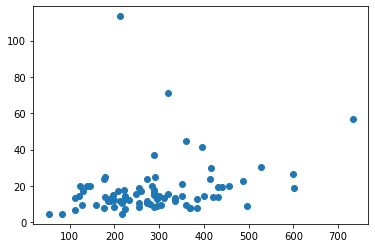

In [38]:
plt.scatter(x=books['pages'], y=books['price'])

In [39]:
books ['price'].corr(books['pages'])

0.24187049391896673

In [40]:
books_19 = books[books.month_year == '19-Oct']
books_19.head()

,index,title,author,author_sex,author_nationality,publisher,publisher_country,month_year,day,pages,ranks,best_seller_rank,general_subject,specific_subject,price,link
0,0,The New American Revolution: The Making of a P...,Kayleigh McEnany,Female,American,Threshold Editions,USA,19-Oct,1,336,378.0,169.159,History,Populism,13.18,https://www.amazon.co.uk/New-American-Revoluti...
1,1,The Finance Curse: How global finance is makin...,Nicholas Shaxson,Male,British,Vintage,UK,19-Oct,17,384,49.0,112.227,Finance,Poor vs Rich,7.99,https://www.amazon.co.uk/Finance-Curse-global-...
2,2,In Light of Yesterday: The Backstory of the Gl...,Brady Raanes,Male,American,Brady Raanes,USA,19-Oct,21,224,44.0,79.231,History,Economy,7.56,https://www.amazon.co.uk/Light-Yesterday-Backs...
3,3,Just a Girl: Growing Up Female and Ambitious,Lucinda Jackson,Female,American,She Writes Press,USA,19-Oct,8,280,18.0,"5,142,822",Sociology,Women,9.99,https://www.amazon.co.uk/Just-Girl-Growing-Fem...
4,4,Socialism: An Economic and Sociological Analysis,Ludwig Von Mises,Male,Austrian,Must Have Books,NaN,19-Oct,23,602,149.0,"2,478,962",Economy,Socialism,18.81,https://www.amazon.co.uk/Socialism-Sociologica...


In [41]:
books_20 = books[books.month_year == '20-Oct']
books_20.head()

,index,title,author,author_sex,author_nationality,publisher,publisher_country,month_year,day,pages,ranks,best_seller_rank,general_subject,specific_subject,price,link
40,40,Charter Schools and Their Enemies,Thomas Sowell,Male,American,Basic Books,USA,20-Oct,15,288,654.00,233.169,Economy,Education,17.60,https://www.amazon.co.uk/Charter-Schools-Enemi...
41,41,Trust: America's Best Chance,Pete Buttigieg,Male,American,John Murray,UK,20-Oct,6,224,367.00,24.096,Economy,Politics,12.99,https://www.amazon.co.uk/Trust-Americas-Chance...
42,42,The Richest Man In Babylon,George S. Clason,Male,American,Sanage Publishing,India,20-Oct,18,190,12.25,NaN,Economy,Development,11.99,https://www.amazon.co.uk/Richest-Man-Babylon-G...
43,43,The Price of Panic: How the Tyranny of Experts...,"Jay W Richards, William M Briggs, Douglas Axe",Male,American,Regnery Publishing,USA,20-Oct,13,256,61.00,69.804,Economy,Pandemic,18.99,https://www.amazon.co.uk/Price-Panic-Tyranny-P...
44,44,Credit: 3 books in 1: The Complete Guide on Cr...,Tony Risk,Male,American,Top Edition Ltd,UK,20-Oct,15,432,31.00,NaN,Finance,Credit,19.66,https://www.amazon.co.uk/Credit-Complete-Secre...


In [47]:
#trying to infer for population because i am working on a sample
#H0:the number of pages from the different books is equal to the number of pages between October 2019 and October 2020
# H1: they are different 

st.ttest_ind(books_19['pages'], books_20['pages'])

# if pvalue < 0.05 you reject H0
#pvalue is equal to 0.99. A p-value higher than 0.05 (> 0.05) is not statistically significant and indicates strong evidence for the null hypothesis. This means we retain the null hypothesis and reject the alternative hypothesis.
#so, covid has no influence in the number of pages.

Ttest_indResult(statistic=0.006200173655637187, pvalue=0.9950688391916672)

In [46]:
#trying to infer for population because i am working on a sample
#H0:the price from the different books is equal to the price between October 2019 and October 2020
# H1: they are different 

st.ttest_ind(books_19['price'], books_20['price'])

# if pvalue < 0.05 you reject H0
#pvalue is equal to 0.63. A p-value higher than 0.05 (> 0.05) is not statistically significant and indicates strong evidence for the null hypothesis. This means we retain the null hypothesis and reject the alternative hypothesis.  
 #so, covid has no influence in the price.

Ttest_indResult(statistic=-0.48336332454352127, pvalue=0.6301918971332217)

In [48]:
books_19.describe()

,index,day,pages,ranks,price
count,40.000000,40.000000,40.000000,40.000000,40.000000
mean,19.500000,16.425000,288.700000,43.252850,17.214750
std,11.690452,8.892196,137.296647,70.924764,18.378172
min,0.000000,1.000000,53.000000,2.000000,4.610000
25%,9.750000,9.500000,199.750000,8.000000,9.295000
50%,19.500000,15.500000,282.000000,17.000000,12.990000
75%,29.250000,23.250000,362.000000,46.000000,17.310000
max,39.000000,30.000000,733.000000,378.000000,113.370000


In [49]:
books_20.describe()

,index,day,pages,ranks,price
count,40.000000,40.000000,40.000000,40.000000,40.000000
mean,59.500000,12.350000,288.525000,67.931250,18.874500
std,11.690452,8.850757,114.086334,132.461593,11.570179
min,40.000000,1.000000,112.000000,0.000000,4.770000
25%,49.750000,6.000000,205.750000,2.000000,11.962500
50%,59.500000,10.000000,280.000000,16.500000,15.975000
75%,69.250000,17.250000,352.000000,49.750000,21.445000
max,79.000000,30.000000,600.000000,654.000000,71.340000


In [50]:
import scipy.stats as st

evolution_subjects = pd.read_csv ('specificsubject.csv')
evolution_subjects.head()

,specific subject,before_covid,after_covid
0,pandemic,0,4
1,development,7,8
2,technology,3,5
3,resources,1,4


In [51]:
evolution_subjects.dtypes

specific subject    object
before_covid         int64
after_covid          int64
dtype: object

In [52]:
#H0:the mean number of different subjects is equal before and after covid 
# H1: they are different 

st.ttest_rel(evolution_subjects['before_covid'], evolution_subjects['after_covid'])

# if pvalue < 0.05 you reject H0
#they are different. pvalue is equal to 0.03 and, because of that, i reject H0.

Ttest_relResult(statistic=-3.872983346207417, pvalue=0.030466291662170977)

In [54]:
#goodness of fitness
evolution_table=[[0.0,4.0],
            [7.0,8.0],
            [3.0,5.0],
            [1.0,4.0]]

st.chi2_contingency(np.array(evolution_table))
#statistic, p-value, degrees of freedom, expected probs if H0 holds
#the result means that the subject are independent of the "before covid-19" and "after covid-19"

(3.5924963924963924,
 0.3089623054808429,
 3,
 array([[1.375  , 2.625  ],
        [5.15625, 9.84375],
        [2.75   , 5.25   ],
        [1.71875, 3.28125]]))